In [147]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import csv 
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

In [146]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [110]:
path="data/"
loading = pd.read_csv(path + 'velibLoading.csv', sep=" ")
coord = pd.read_csv(path + 'velibCoord.csv', sep=" ")

In [111]:
loading.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [22]:
coord.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

Do these df contain missing data?

In [23]:
print('--Loading--')
print(loading.isnull().sum().sum())
print('--Coord--')
print(coord.isnull().sum())

--Loading--
0
--Coord--
longitude    0
latitude     0
bonus        0
names        0
dtype: int64


In [24]:
print('--Loading--')
print(loading.duplicated().sum())
# nous n'avons pas de données dupliquées dans les colonnes de loading 
print('--Coord--')
print(coord.duplicated().sum())
#pareil pour coord

--Loading--
0
--Coord--
0


In [25]:
station_names = coord.names.value_counts()
print(station_names)

name = station_names.index[0]
print(coord[coord.names==name])

 PORTE DES LILAS                 3
 GARE D'AUSTERLITZ               3
 PORTE DE BAGNOLET               2
 CHERCHE MIDI                    2
 LEGENDRE                        2
                                ..
 BEL AIR                         1
 ASSAS LUXEMBOURG                1
 COURS DE VINCENNES BD DAVOUT    1
 RUISSEAU ORDENER                1
 QUAI VOLTAIRE                   1
Name: names, Length: 1161, dtype: int64
     longitude   latitude  bonus             names
362   2.404770  48.876604      1   PORTE DES LILAS
450   2.405960  48.875412      1   PORTE DES LILAS
957   2.411046  48.878099      1   PORTE DES LILAS


<Axes: >

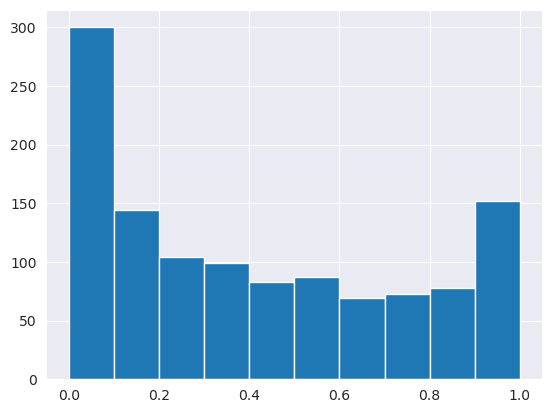

In [26]:
loading["Lun-02"].hist()

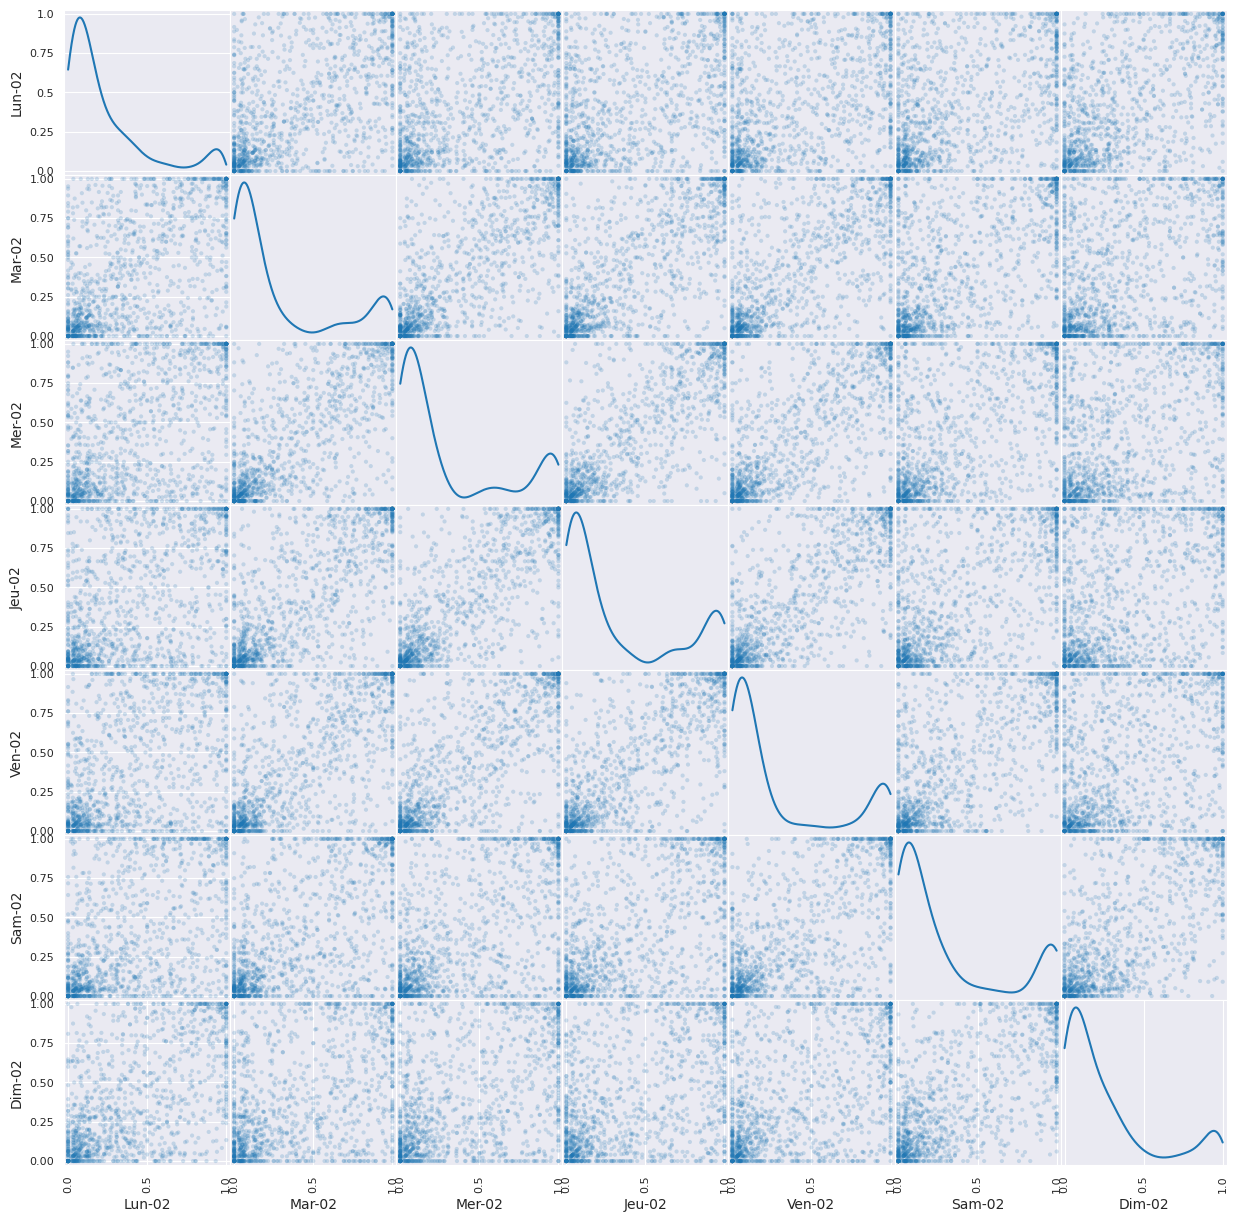

In [27]:
from pandas.plotting import scatter_matrix
heure="02"
scatter_matrix(loading[["Lun-"+heure,
                        "Mar-"+heure,
                        "Mer-"+heure,
                        "Jeu-"+heure,
                        "Ven-"+heure,
                        "Sam-"+heure,
                        "Dim-"+heure]], alpha=0.2, 
               figsize=(15, 15), diagonal='kde')
plt.show()

On observe une certaine corrélation entre les différents jours de la semaine : les points sont relativement ordonnés d'un jour de la semaine à un autre, et il en va de même pour les jours de week-end. En revanche, on remarque que le chargement dans les stations sur jours de la semaine et sur ceux du week-end semblent avoir des profils très différents.

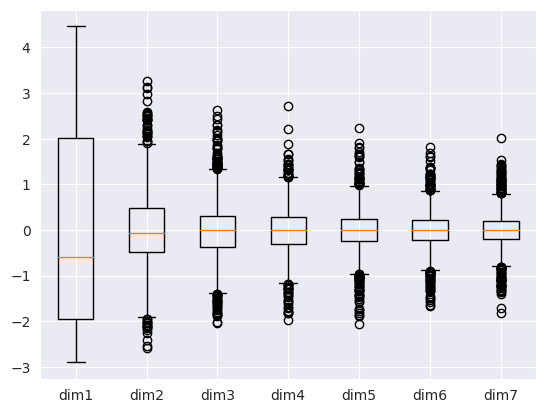

In [28]:
dim="dim"
tags = ["dim1","dim2","dim3","dim4","dim5","dim6","dim7"]
plt.boxplot(C[:,0:7], labels=tags)
plt.show()

On observe bien la première dimension explique a peu près 70% de la variance empirique, et que l'on peut s'arrêter à la dimension 3.

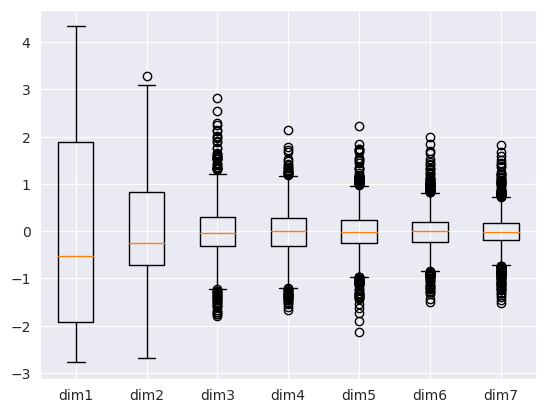

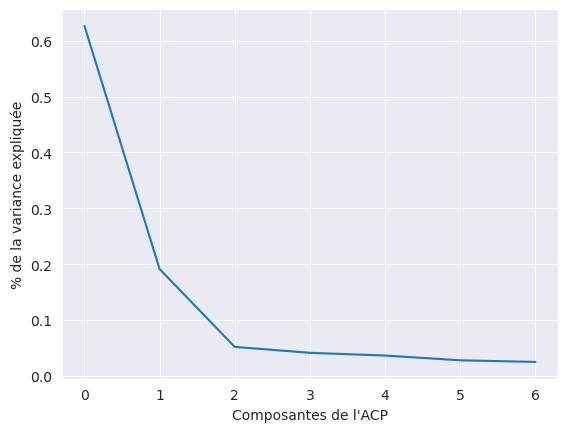

On garde les 3 premières composantes de l'ACP, afin d'expliquer 85.0 % de la variance empirique.


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
#X=scale(ozone[["O3obs","MOCAGE","TEMPE","VentMOD","VentANG","SRMH2O","LNO2","LNO"]])
heure="12"
X=scale(loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
dim="dim"
tags = ["dim1","dim2","dim3","dim4","dim5","dim6","dim7"]
plt.boxplot(C[:,0:7], labels=tags)
plt.show()
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Composantes de l'ACP")
plt.ylabel("% de la variance expliquée")
plt.show()


ratio_voulu = 0.85
index = 0
cumul = 0

while cumul<ratio_voulu:
    cumul += pca.explained_variance_ratio_[index]
    index += 1
    
print("On garde les" ,index, "premières composantes de l'ACP, afin d'expliquer", ratio_voulu*100 ,"% de la variance empirique.")

Faisons de même avec toutes les heures de la journée à la fois.

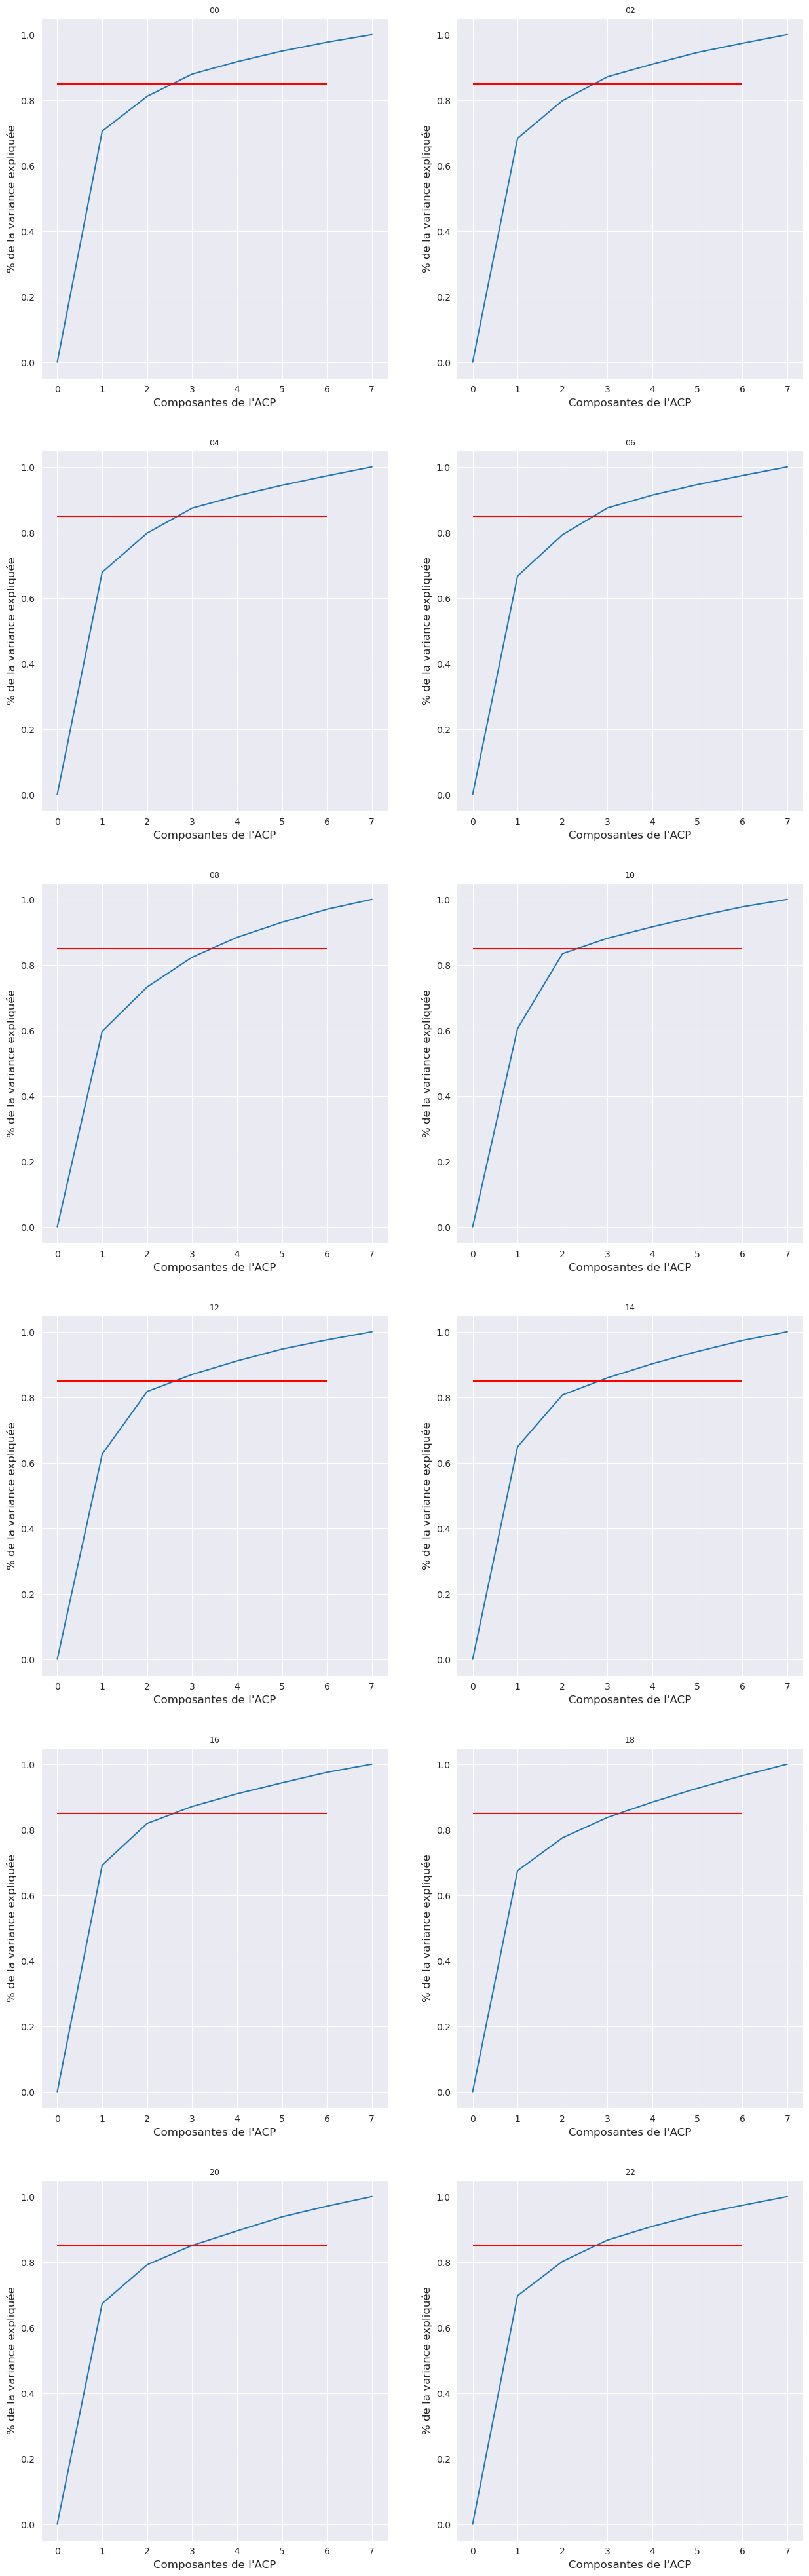

In [30]:
heures=["00","02","04","06","08","10","12","14","16","18","20","22"]
nlig=6
ncol=2


fig, axs= plt.subplots(nlig,ncol, figsize=(15,50))
for i in range(nlig):
    for j in range(ncol):
        cumul_variance_ratio=[0]
        heure=heures[i*ncol+j]
        X=scale(loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]])
        pca = PCA()
        C = pca.fit(X).transform(X)
        for k in range(len(pca.explained_variance_ratio_)):
            if k == 0 :
                cumul_variance_ratio.append(pca.explained_variance_ratio_[k])
            else:
                cumul_variance_ratio.append(pca.explained_variance_ratio_[k]+cumul_variance_ratio[k])
        axs[i,j].plot(cumul_variance_ratio)
        axs[i,j].hlines(ratio_voulu, 0, 6, color='red')
        plt.xlabel("Composantes de l'ACP")
        plt.ylabel("% de la variance expliquée")
        axs[i,j].set_title(heure, fontsize = 9)
        
for ax in axs.flat:
    ax.set_xlabel("Composantes de l'ACP", fontsize = 12)
    ax.set_ylabel('% de la variance expliquée', fontsize = 12)

plt.show()

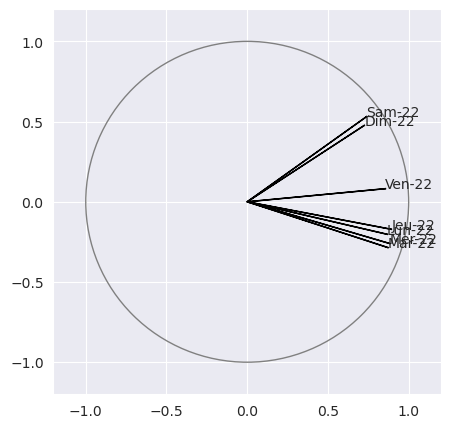

In [31]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim2)

En choisissant 12h, on voit que l'axe 1 est beaucoup plus corrélé aux variables de la semaine, tandis que l'axe 2 est plus corrélé aux variables du week-end. 

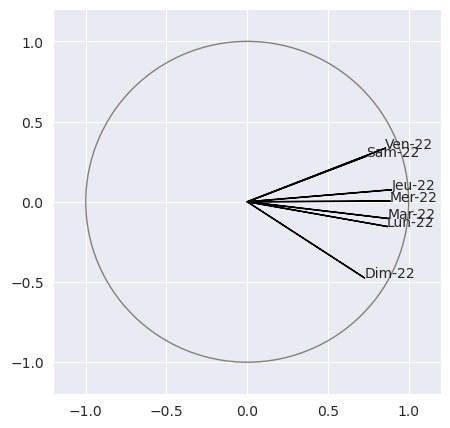

In [32]:
coord3=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord3, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim3)

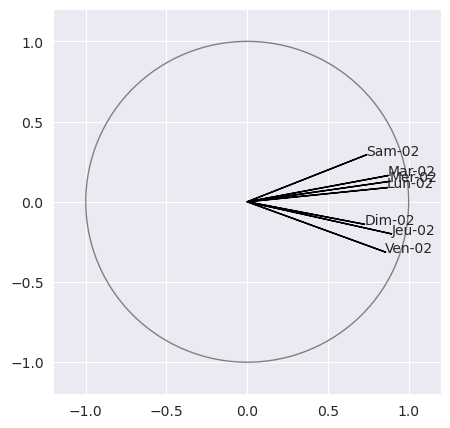

In [33]:
coord4=pca.components_[3]*np.sqrt(pca.explained_variance_[3])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
heure="02"
for i, j, nom in zip(coord1,coord4, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim1,dim4)

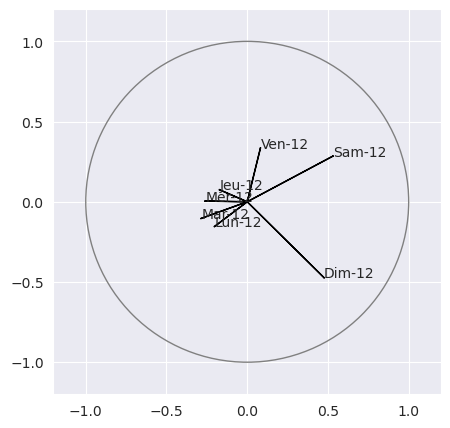

In [34]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
heure="12"
for i, j, nom in zip(coord2,coord3, loading[["Lun-"+heure,
                "Mar-"+heure,
                "Mer-"+heure,
                "Jeu-"+heure,
                "Ven-"+heure,
                "Sam-"+heure,
                "Dim-"+heure]]):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

#On projette les variables Lun-12, Mar-12... sur l'hyperplan formé par (dim2,dim3)

On remarque que les jours de la semaine sont mal projetés dans ce plan, donc mal expliqués par ce couple de dimensions. Les jours du week-end sont, eux, corrélés négativement par rapport à la troisième composante.

In [35]:
print(pca.components_)

[[ 0.39182013  0.39407186  0.39931251  0.40358143  0.38688517  0.33423929
   0.32781071]
 [-0.23631615 -0.33305692 -0.30373793 -0.2000882   0.09528034  0.61931339
   0.5552552 ]
 [-0.22774533 -0.15377559  0.00655016  0.11071439  0.49454066  0.42108592
  -0.70021478]
 [ 0.16249005  0.30114537  0.2347464  -0.36822928 -0.57763663  0.54033414
  -0.25804013]
 [ 0.82957549 -0.27274937 -0.34765109 -0.26235665  0.17676249  0.00246465
  -0.12833135]
 [ 0.15378223 -0.51184149  0.04130019  0.68256377 -0.46725269  0.15522331
  -0.06596177]
 [-0.02272085  0.53204423 -0.75536549  0.33839615 -0.11591774  0.1065849
  -0.08078654]]


On voit bien que samedi et dimanche sont très corrélés 

### Clustering par Kmeans

(a comprendre plus tard)

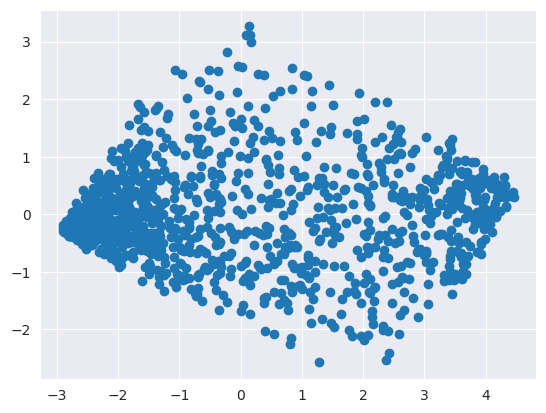

In [36]:
plt.scatter(C[:,0], C[:,1])

In [37]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=2, n_init='auto')
clust.fit(X)
classe=clust.labels_
print(classe)

[1 1 1 ... 0 1 0]


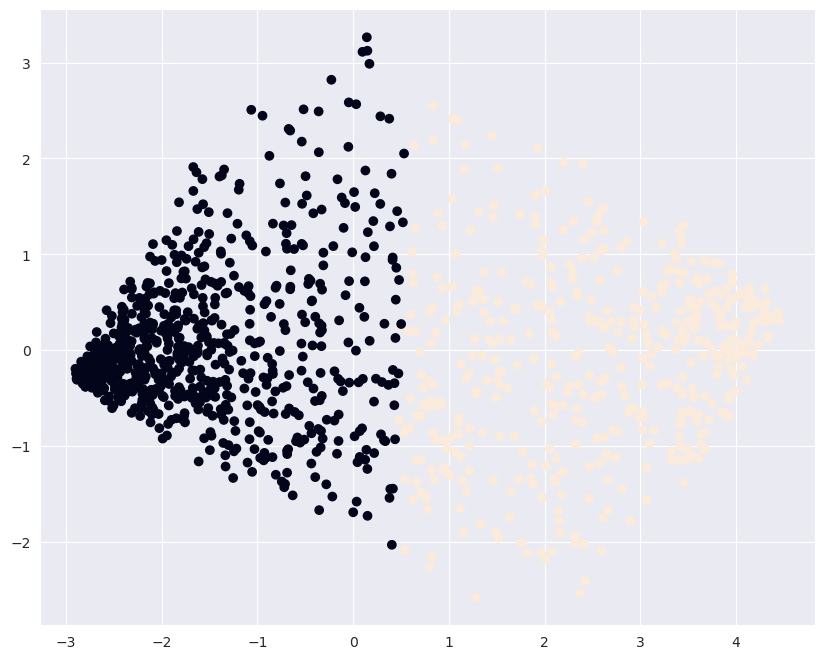

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

### Etude de l'heure

Peut-on expliquer le chargement des stations en fonction de l'heure?

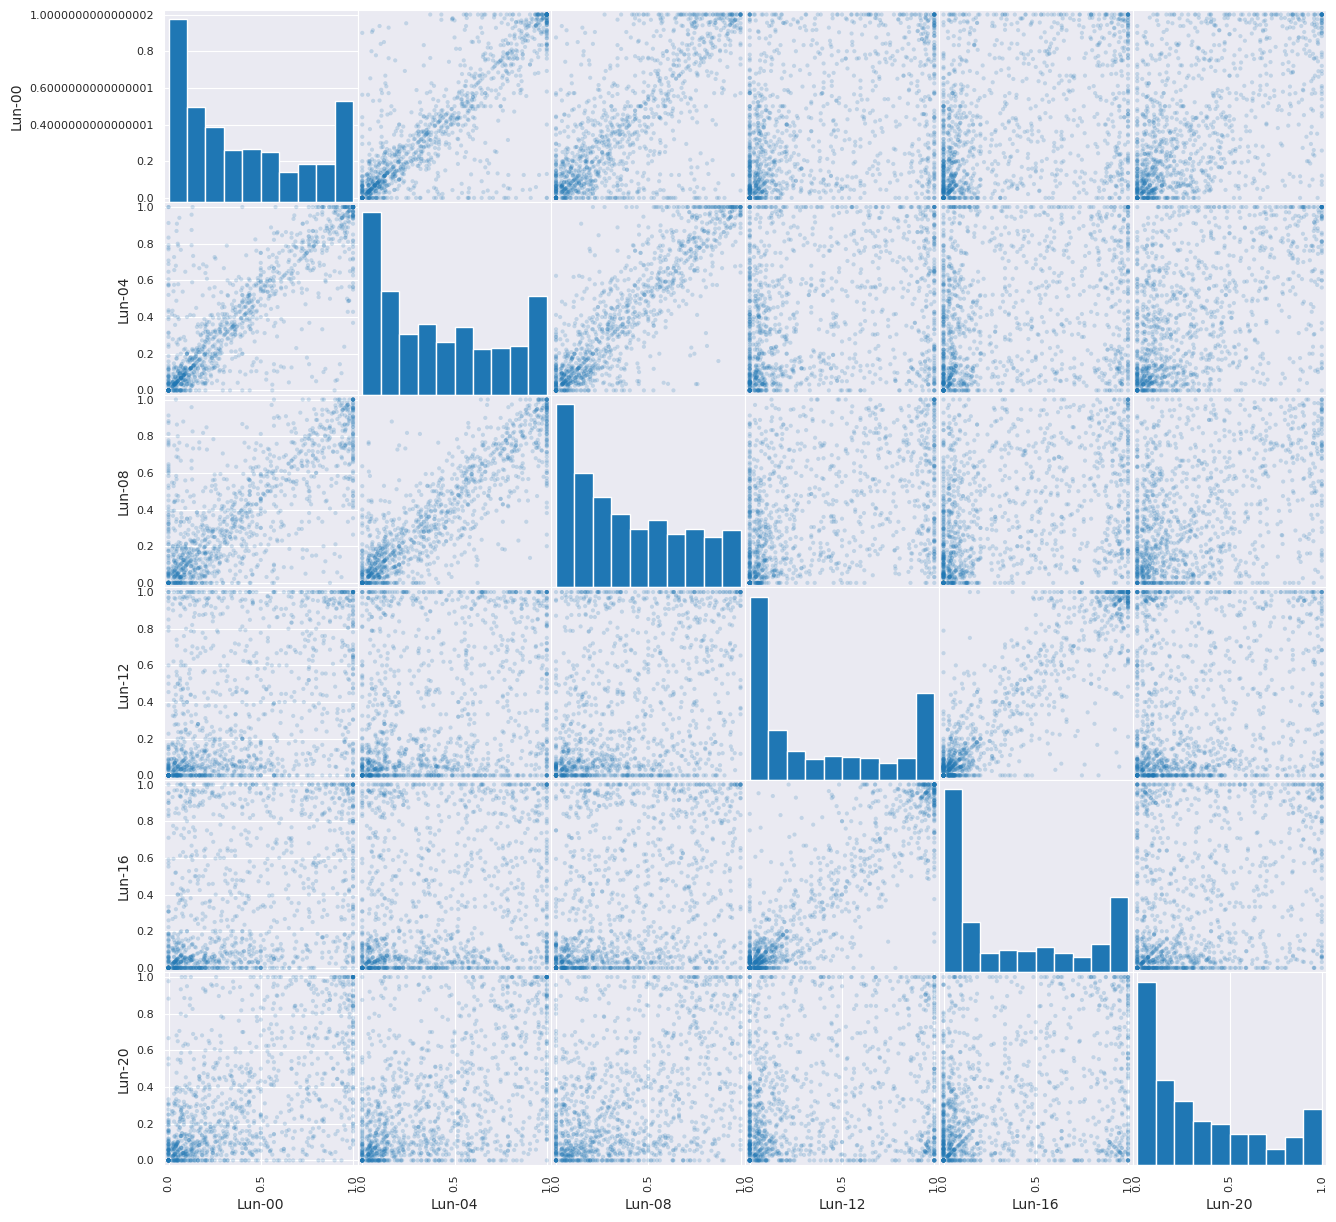

In [39]:
from pandas.plotting import scatter_matrix
jour="Lun-"
scatter_matrix(loading[[jour+"00",
                        jour+"04",
                        jour+"08",
                        jour+"12",
                        jour+"16",
                        jour+"20"]], alpha=0.2, figsize=(15, 15), diagonal='hist')
plt.show()

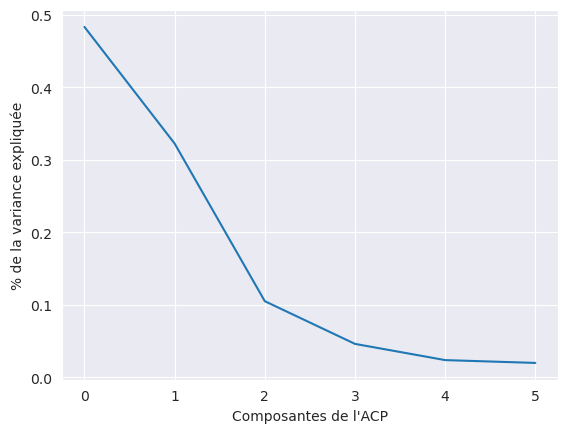

On garde les 3 premières composantes de l'ACP, afin d'expliquer 90.0 % de la variance empirique.


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
jour="Mar-"
X=scale(loading[[jour+"00",
                 jour+"04",
                 jour+"08",
                 jour+"12",
                 jour+"16",
                 jour+"20"]])
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Composantes de l'ACP")
plt.ylabel("% de la variance expliquée")
plt.show()


ratio_voulu = 0.90
index = 0
cumul = 0

while cumul<ratio_voulu:
    cumul += pca.explained_variance_ratio_[index]
    index += 1

print("On garde les" ,index, "premières composantes de l'ACP, afin d'expliquer", ratio_voulu*100 ,"% de la variance empirique.")

Faisons de même avec tous les jours de la semaine à la fois.

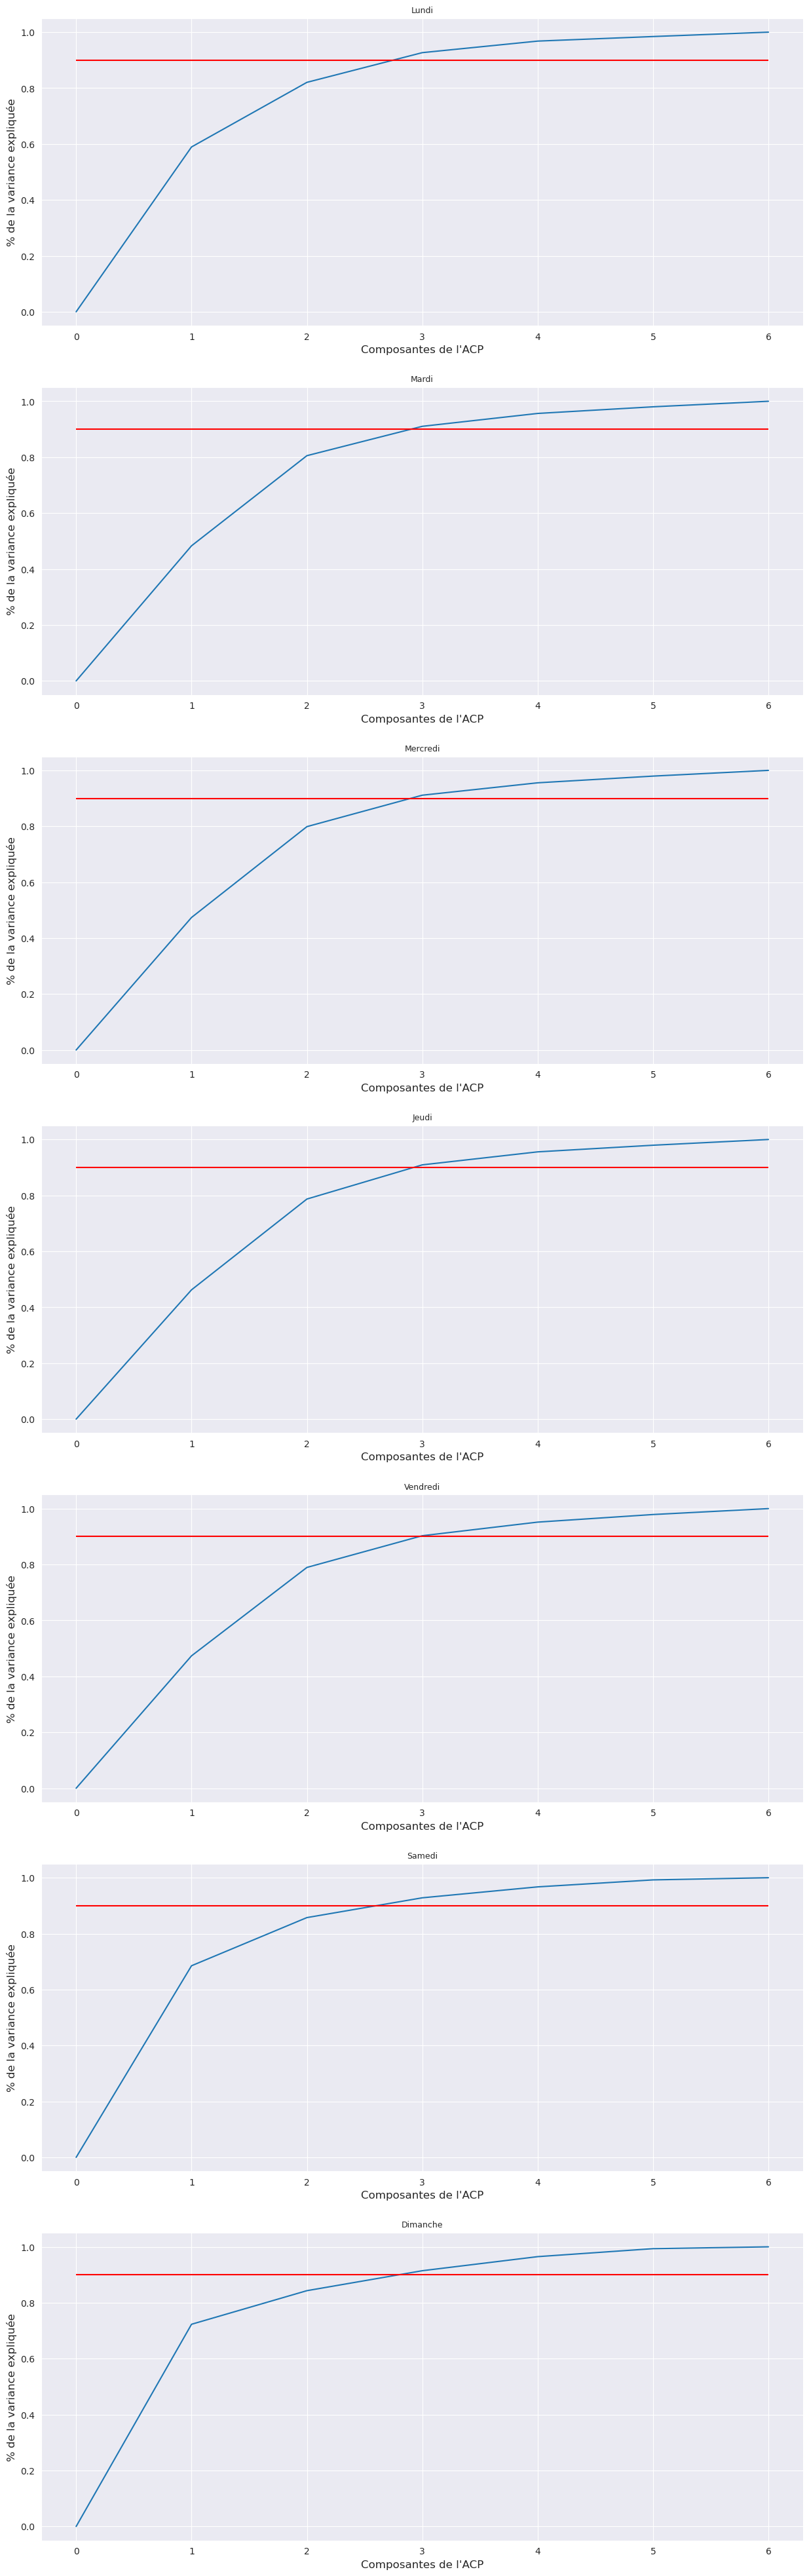

In [41]:
jours=["Lun-","Mar-","Mer-","Jeu-","Ven-","Sam-","Dim-"]
titles=["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

fig, axs= plt.subplots(7,1, figsize=(15,50))
for i in range(len(jours)):
        cumul_variance_ratio=[0]
        jour=jours[i]
        X=scale(loading[[jour+"00",
                 jour+"04",
                 jour+"08",
                 jour+"12",
                 jour+"16",
                 jour+"20"]])
        pca = PCA()
        C = pca.fit(X).transform(X)
        for j in range(len(pca.explained_variance_ratio_)):
            if j == 0 :
                cumul_variance_ratio.append(pca.explained_variance_ratio_[j])
            else:
                cumul_variance_ratio.append(pca.explained_variance_ratio_[j]+cumul_variance_ratio[j])
        axs[i].plot(cumul_variance_ratio)
        axs[i].hlines(ratio_voulu, 0, 6, color='red')
        plt.xlabel("Composantes de l'ACP")
        plt.ylabel("% de la variance expliquée")
        axs[i].set_title(titles[i], fontsize = 9)
        
for ax in axs.flat:
    ax.set_xlabel("Composantes de l'ACP", fontsize = 12)
    ax.set_ylabel('% de la variance expliquée', fontsize = 12)

plt.show()

3 Composantes de l'ACP nous permettent d'expliquer plus de 90% de la variance pour tous les jours de la semaine.

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


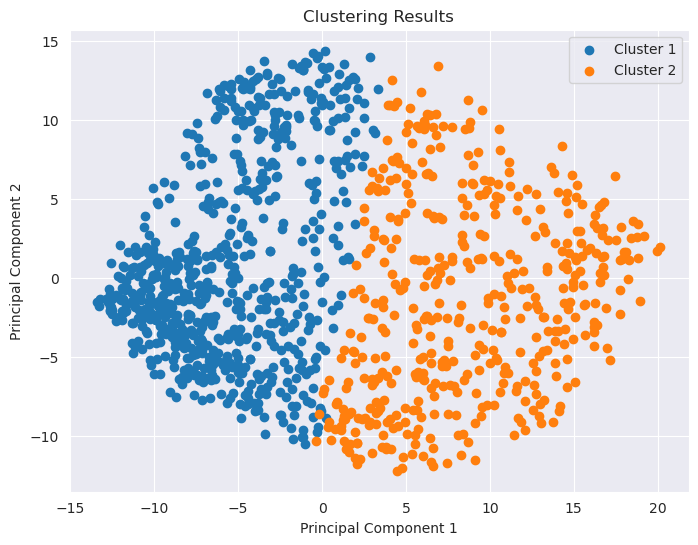

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suppose wine2 is your dataset
# You need to import wine2 before applying KMeans

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=2)

# Exclude the first two columns from wine2 as they seem to be excluded in R code
loading2 = loading

# Fit KMeans to your data
reskmeans = kmeans.fit(loading2)
scaler = StandardScaler()
loading2_scaled = scaler.fit_transform(loading2)

# Apply PCA for dimensionality reduction (optional but often used for visualization)
pca = PCA(n_components=2)
loading2_pca = pca.fit_transform(loading2_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot each point with a different color based on its cluster
for cluster in range(kmeans.n_clusters):
    plt.scatter(loading2_pca[reskmeans.labels_ == cluster, 0], loading2_pca[reskmeans.labels_ == cluster, 1], label=f'Cluster {cluster + 1}')

plt.title('Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
loading.iloc[:,range(24*5)]

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1     0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2     0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3     0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4     0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5     0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   
...        ...       ...       ...       ...       ...       ...       ...   
1185  0.000000  0.000000  0.000000  0.000000  0.000000  0.045455  0.000000   
1186  0.200000  0.133333  0.155556  0.177778  0.177778  0.177778  0.200000   
1187  0.551724  0.517241  0.551724  0.517241  0.517241  0.551724  0.551724   
1188  0.476190  0.428571  0.428571  0.428571  0.428571  0.428571  0.476190   
1189  0.937500  0.968750  0.906250  0.875000  0.906250  0.906250  0.937500   

        Lun-07    Lun-08    Lun-09  ...    Ven-14    Ven-15    Ven-16  \
1     0.038462  0.107143  0.000000  ...  0.178571  0.071429  0.000000   
2     0.434783  0.260870  0.043478  ...  0.086957  0.000000  0.173913   
3     0.090909  0.054545  0.109091  ...  0.618182  0.636364  0.818182   
4     1.000000  1.000000  1.000000  ...  0.952381  0.904762  0.761905   
5     0.724638  0.753623  0.971014  ...  0.893939  0.969697  0.969697   
...        ...       ...       ...  ...       ...       ...       ...   
1185  0.090909  0.136364  0.000000  ...  0.000000  0.000000  0.000000   
1186  0.177778  0.288889  0.511111  ...  0.400000  0.333333  0.244444   
1187  0.448276  0.241379  0.034483  ...  0.233333  0.133333  0.033333   
1188  0.523810  0.428571  0.476190  ...  0.160000  0.080000  0.200000   
1189  0.937500  0.968750  1.000000  ...  0.516129  0.625000  0.645161   

        Ven-17    Ven-18    Ven-19    Ven-20    Ven-21    Ven-22    Ven-23  
1     0.035714  0.107143  0.428571  0.892857  0.821429  0.928571  1.000000  
2     0.130435  0.347826  0.782609  0.956522  1.000000  0.869565  0.956522  
3     0.927273  0.963636  0.981818  0.963636  0.854545  0.727273  0.745455  
4     0.238095  0.047619  0.000000  0.000000  0.047619  0.095238  0.095238  
5     0.800000  0.712121  0.600000  0.393939  0.500000  0.630769  0.753846  
...        ...       ...       ...       ...       ...       ...       ...  
1185  0.086957  0.043478  0.086957  0.130435  0.043478  0.000000  0.173913  
1186  0.288889  0.200000  0.333333  0.133333  0.155556  0.155556  0.355556  
1187  0.066667  0.000000  0.000000  0.033333  0.133333  0.066667  0.033333  
1188  0.040000  0.160000  0.240000  0.320000  0.520000  0.440000  0.400000  
1189  0.516129  0.225806  0.156250  0.187500  0.250000  0.312500  0.187500  

[1189 rows x 120 columns]

In [122]:
load_semaine = loading.iloc[:,range(24*5)]


moy_semaine=load_semaine.mean(axis=1)
moy_semaine

load_weekend = loading.iloc[:,[24*5+1,24*7-1]]

moy_weekend=load_weekend.mean(axis=1)
moy_weekend

0       0.398352
1       0.630435
2       0.421549
3       0.452381
4       0.695221
          ...   
1184    0.065217
1185    0.333333
1186    0.205747
1187    0.417391
1188    0.598684
Length: 1189, dtype: float64

In [124]:
loading.reset_index(inplace=True,drop=True)
loading2=loading
loading2.head()

moy_weekend    Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05  \
0     0.344780  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462   
1     0.695652  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783   
2     0.485522  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091   
3     0.428571  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
4     0.710956  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638   

     Lun-06    Lun-07    Lun-08  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
0  0.038462  0.038462  0.107143  ...  0.296296  0.111111  0.111111  0.148148   
1  0.434783  0.434783  0.260870  ...  0.043478  0.000000  0.217391  0.130435   
2  0.090909  0.090909  0.054545  ...  0.259259  0.259259  0.203704  0.129630   
3  0.952381  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
4  0.724638  0.724638  0.753623  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
0  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
1  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
2  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
3  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
4  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 169 columns]

In [126]:
loading2= loading2.drop('moy_weekend', axis=1)

In [128]:
loading2.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
0  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
1  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
2  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
3  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
4  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
0  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
1  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
2  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
3  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
4  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
0  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
1  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
2  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
3  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
4  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [90]:
loading2=loading2.drop('moy_weekend',axis=1)

In [91]:
loading2.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [131]:
loading2.insert(168, 'moy_semaine', moy_semaine)

In [132]:
loading2.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
0  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
1  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
2  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
3  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
4  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-16    Dim-17    Dim-18    Dim-19  \
0  0.038462  0.107143  0.000000  ...  0.111111  0.148148  0.307692  0.076923   
1  0.434783  0.260870  0.043478  ...  0.217391  0.130435  0.045455  0.173913   
2  0.090909  0.054545  0.109091  ...  0.203704  0.129630  0.148148  0.296296   
3  1.000000  1.000000  1.000000  ...  0.904762  0.857143  0.857143  0.857143   
4  0.724638  0.753623  0.971014  ...  0.590909  0.833333  1.000000  0.818182   

     Dim-20    Dim-21    Dim-22    Dim-23  moy_semaine  moy_weekend  
0  0.115385  0.076923  0.153846  0.153846     0.307764     0.398352  
1  0.173913  0.173913  0.260870  0.391304     0.504710     0.630435  
2  0.314815  0.370370  0.370370  0.407407     0.461533     0.421549  
3  0.761905  0.761905  0.761905  0.761905     0.418367     0.452381  
4  0.636364  0.712121  0.621212  0.575758     0.588442     0.695221  

[5 rows x 170 columns]

In [133]:
loading2_pca

array([[ -3.04715381,  -6.56190779],
       [  6.47907973, -11.62599831],
       [  3.12000329,   3.04173735],
       ...,
       [ -3.33527311,  -1.97433309],
       [  6.69776212,   3.82039808],
       [  4.06668122,  10.9169057 ]])

In [134]:
loading2_pca_df = pd.DataFrame(data = loading2_pca,columns=['pca_1','pca_2'])
loading2_pca_df.head()

pca_1      pca_2
0 -3.047154  -6.561908
1  6.479080 -11.625998
2  3.120003   3.041737
3  0.659095   9.916072
4  4.443095   7.624636

In [135]:
loading2 = pd.concat([loading2,loading2_pca_df],axis=1)
#on concatène notre data frame contenant les moyenne de semaine et weekend avec les 2 composantes principales

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
0  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
1  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
2  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
3  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
4  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-18    Dim-19    Dim-20    Dim-21  \
0  0.038462  0.107143  0.000000  ...  0.307692  0.076923  0.115385  0.076923   
1  0.434783  0.260870  0.043478  ...  0.045455  0.173913  0.173913  0.173913   
2  0.090909  0.054545  0.109091  ...  0.148148  0.296296  0.314815  0.370370   
3  1.000000  1.000000  1.000000  ...  0.857143  0.857143  0.761905  0.761905   
4  0.724638  0.753623  0.971014  ...  1.000000  0.818182  0.636364  0.712121   

     Dim-22    Dim-23  moy_semaine  moy_weekend     pca_1      pca_2  
0  0.153846  0.153846     0.307764     0.398352 -3.047154  -6.561908  
1  0.260870  0.391304     0.504710     0.630435  6.479080 -11.625998  
2  0.370370  0.407407     0.461533     0.421549  3.120003   3.041737  
3  0.761905  0.761905     0.418367     0.452381  0.659095   9.916072  
4  0.621212  0.575758     0.588442     0.695221  4.443095   7.624636  

[5 rows x 172 columns]

In [96]:
loading2.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-16    Dim-17    Dim-18    Dim-19  \
1  0.038462  0.107143  0.000000  ...  0.111111  0.148148  0.307692  0.076923   
2  0.434783  0.260870  0.043478  ...  0.217391  0.130435  0.045455  0.173913   
3  0.090909  0.054545  0.109091  ...  0.203704  0.129630  0.148148  0.296296   
4  1.000000  1.000000  1.000000  ...  0.904762  0.857143  0.857143  0.857143   
5  0.724638  0.753623  0.971014  ...  0.590909  0.833333  1.000000  0.818182   

     Dim-20    Dim-21    Dim-22    Dim-23  moy_semaine  moy_weekend  
1  0.115385  0.076923  0.153846  0.153846     0.313224     0.344780  
2  0.173913  0.173913  0.260870  0.391304     0.506884     0.695652  
3  0.314815  0.370370  0.370370  0.407407     0.463699     0.485522  
4  0.761905  0.761905  0.761905  0.761905     0.415589     0.428571  
5  0.636364  0.712121  0.621212  0.575758     0.588800     0.710956  

[5 rows x 170 columns]

Nous allons maintenant observer la corrélation entre la 1ère composante principale et la moyenne par semaine.Pareil pour la 2ème composante principale et la moyenne en weekend

In [136]:
import numpy
print(numpy.corrcoef(loading2['moy_semaine'],loading2['pca_1']))

[[1.         0.94935183]
 [0.94935183 1.        ]]


In [137]:
print(numpy.corrcoef(loading2['moy_weekend'],loading2['pca_2']))

[[ 1.         -0.09612441]
 [-0.09612441  1.        ]]


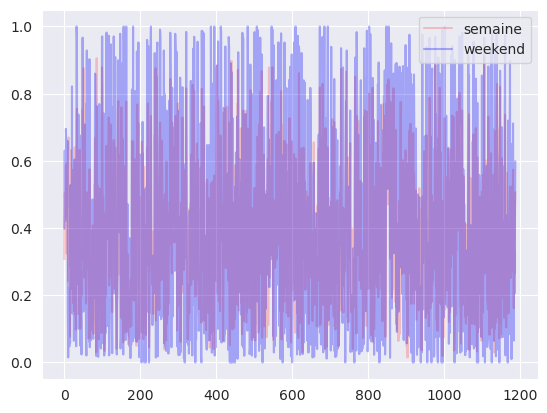

In [144]:
plt.figure()
plt.plot(loading2['moy_semaine'], color='red', label="semaine", alpha=0.2)
plt.plot(loading2['moy_weekend'], color='blue', label="weekend", alpha=0.3)
plt.legend()
plt.show()

On peut voir qu'en weekend la moyenne est plus proche de 1, les stations sont plus remplies. Cela signifie que les vélos sont moins utilisés le weekend, ce qui est cohérent puisqu'en semaine, les gens prennent le vélo notamment pour se déplacer au travail. 


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/i

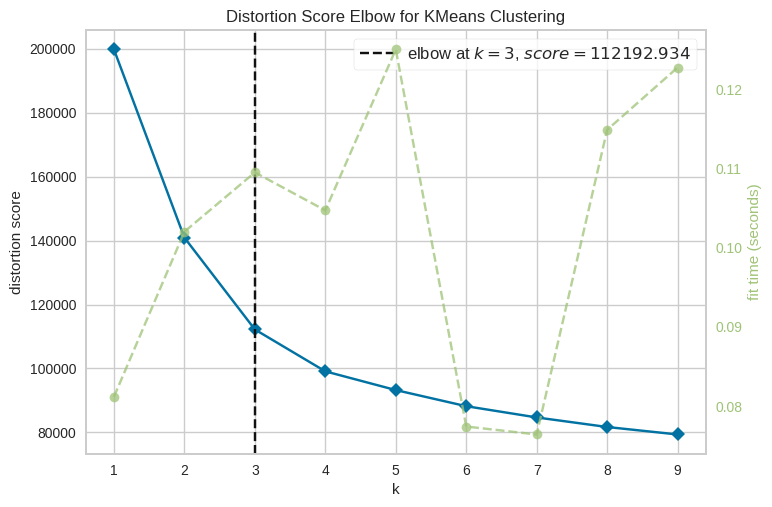

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [153]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion') # 'distortion' pour la somme totale des carrés intra-cluster
visualizer.fit(loading2_scaled)
visualizer.show()

On voit que le nombre optimal de cluster vaut 3.

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/i

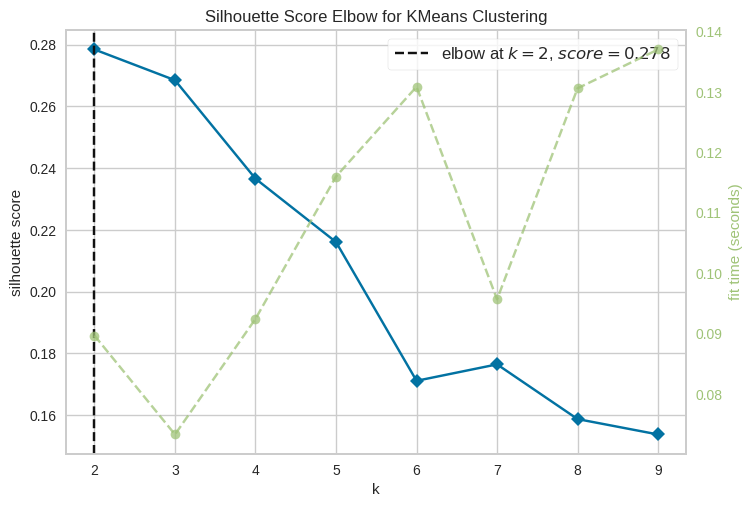

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [155]:
from sklearn.metrics import silhouette_score
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette') # On commence à k=2 car silhouette score nécessite au moins 2 clusters
visualizer.fit(loading2_scaled)
visualizer.show()

On voit que le nombre optimal de cluster vaut 3.